# 노이즈 제거

In [1]:
from keras.utils import set_random_seed, plot_model
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [2]:
set_random_seed(11)

In [3]:
# # 이미지를 넘파이배열로 변환
# noisy_list=os.listdir('./Noisy_Documents/noisy/')
# x_train1=[]
# x_train2=[]
# for i in noisy_list:
#     img = Image.open(f'./Noisy_Documents/noisy/{i}')
#     img=np.array(img)
#     if img.shape == (420, 540, 3):
#         x_train1.append(np.array(img))
#     elif img.shape == (258, 540, 3):
#         x_train2.append(np.array(img))
#     else: print(i, img.shape)

In [69]:
# 이미지를 넘파이배열로 변환
noisy_list=os.listdir('./Noisy_Documents/noisy/')
x_train=[]
for i in noisy_list:
    img = plt.imread(f'./Noisy_Documents/noisy/{i}')
    img=resize(img, (100, 100))
    x_train.append(np.array(img))

In [70]:
x_train=np.array(x_train)
x_train.shape

(216, 100, 100, 3)

In [71]:
x_train[0]

array([[[0.93223554, 0.93223554, 0.93223554],
        [0.87935865, 0.87935865, 0.87935865],
        [0.82648325, 0.82648325, 0.82648325],
        ...,
        [0.7684532 , 0.7684532 , 0.7684532 ],
        [0.7025432 , 0.7025432 , 0.7025432 ],
        [0.67582625, 0.67582625, 0.67582625]],

       [[0.9768382 , 0.9768382 , 0.9768382 ],
        [0.9787731 , 0.9787731 , 0.9787731 ],
        [0.9373569 , 0.9373569 , 0.9373569 ],
        ...,
        [0.79976445, 0.79976445, 0.79976445],
        [0.8563526 , 0.8563526 , 0.8563526 ],
        [0.839343  , 0.839343  , 0.839343  ]],

       [[0.879806  , 0.879806  , 0.879806  ],
        [0.95602113, 0.95602113, 0.95602113],
        [0.99409634, 0.99409634, 0.99409634],
        ...,
        [0.6696247 , 0.6696247 , 0.6696247 ],
        [0.8124551 , 0.8124551 , 0.8124551 ],
        [0.82170284, 0.82170284, 0.82170284]],

       ...,

       [[0.9353126 , 0.9353126 , 0.9353126 ],
        [0.8523425 , 0.8523425 , 0.8523425 ],
        [0.5643423 , 0

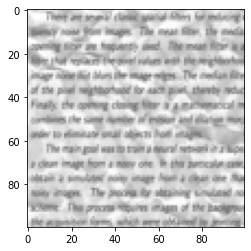

In [72]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [73]:
# 이미지를 넘파이배열로 변환
clean_list=os.listdir('./Noisy_Documents/clean/')
y_train=[]
for i in clean_list:
    img = plt.imread(f'./Noisy_Documents/clean/{i}')
    img=resize(img, (100, 100))
    y_train.append(np.array(img))

In [74]:
y_train=np.array(y_train)
y_train.shape

(216, 100, 100)

In [75]:
y_train[0]

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.99918157, 0.99989605,
        0.9999808 ],
       [1.        , 1.        , 1.        , ..., 0.8516493 , 0.98439246,
        0.9818642 ],
       ...,
       [0.99987096, 0.9301238 , 0.58874226, ..., 0.6105175 , 0.9586933 ,
        0.99503124],
       [0.9997874 , 0.90838444, 0.6943702 , ..., 0.77364653, 0.9934409 ,
        0.81898934],
       [0.9998914 , 0.9523342 , 0.7778162 , ..., 0.62104595, 0.97939605,
        0.90263134]], dtype=float32)

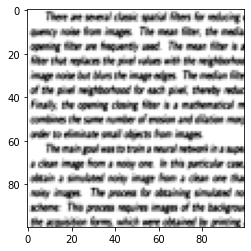

In [76]:
plt.imshow(y_train[0], cmap='gray')
plt.show()

In [77]:
# # 스케일링
# x_train=x_train/255.0
# y_train=y_train/255.0

In [78]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=11)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=11)


In [79]:
x_train.shape, x_val.shape, x_test.shape

((121, 100, 100, 3), (41, 100, 100, 3), (54, 100, 100, 3))

In [95]:
def createAEModel(n_node):
    
    model=Sequential()
    # 입력
    model.add(Conv2D(n_node, kernel_size=3, padding='same', input_shape=(100,100,3)))
    
    # 출력
    model.add(Conv2D(1,kernel_size=3, padding='same', activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [96]:
def createModel(n_node):
    model=Sequential()
    model.add(Dense(units=n_node, activation='relu', input_shape=(30000,)))
    model.add(Dense(30000, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
model=createAEModel(50)

In [91]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
4/4 [==============================] - 3s 622ms/step - loss: 0.0207 - val_loss: 0.0203
Epoch 2/10
4/4 [==============================] - 2s 562ms/step - loss: 0.0197 - val_loss: 0.0192
Epoch 3/10
4/4 [==============================] - 2s 570ms/step - loss: 0.0186 - val_loss: 0.0183
Epoch 4/10
4/4 [==============================] - 2s 567ms/step - loss: 0.0177 - val_loss: 0.0176
Epoch 5/10
4/4 [==============================] - 2s 562ms/step - loss: 0.0172 - val_loss: 0.0173
Epoch 6/10
4/4 [==============================] - 2s 551ms/step - loss: 0.0169 - val_loss: 0.0172
Epoch 7/10
4/4 [==============================] - 2s 551ms/step - loss: 0.0170 - val_loss: 0.0172
Epoch 8/10
4/4 [==============================] - 2s 544ms/step - loss: 0.0169 - val_loss: 0.0172
Epoch 9/10
4/4 [==============================] - 2s 531ms/step - loss: 0.0168 - val_loss: 0.0170
Epoch 10/10
4/4 [==============================] - 2s 534ms/step - loss: 0.0166 - val_loss: 0.0168


1/1 [==============================] - 0s 45ms/step


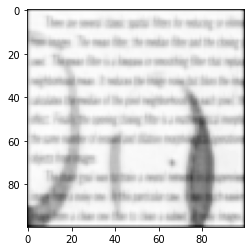

In [98]:
pre_out=model.predict(x_test[15].reshape(-1,100,100,3))
plt.imshow(pre_out.reshape(100,100), cmap='gray')
plt.show()

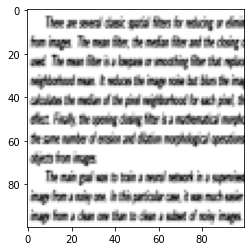

In [89]:
plt.imshow(y_test[15], cmap='gray')
plt.show()

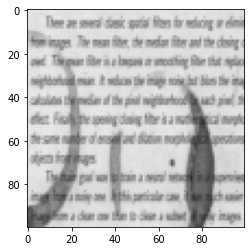

In [90]:
plt.imshow(x_test[15], cmap='gray')
plt.show()

In [97]:
model2=createModel(50)
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
4/4 [==============================] - 3s 708ms/step - loss: 0.0165 - val_loss: 0.0167
Epoch 2/10
4/4 [==============================] - 3s 641ms/step - loss: 0.0164 - val_loss: 0.0166
Epoch 3/10
4/4 [==============================] - 2s 647ms/step - loss: 0.0163 - val_loss: 0.0165
Epoch 4/10
4/4 [==============================] - 2s 569ms/step - loss: 0.0162 - val_loss: 0.0164
Epoch 5/10
4/4 [==============================] - 2s 618ms/step - loss: 0.0161 - val_loss: 0.0163
Epoch 6/10
4/4 [==============================] - 2s 587ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 7/10
4/4 [==============================] - 2s 594ms/step - loss: 0.0158 - val_loss: 0.0160
Epoch 8/10
4/4 [==============================] - 2s 528ms/step - loss: 0.0157 - val_loss: 0.0159
Epoch 9/10
4/4 [==============================] - 2s 576ms/step - loss: 0.0156 - val_loss: 0.0158
Epoch 10/10
4/4 [==============================] - 2s 562ms/step - loss: 0.0154 - val_loss: 0.0157
